<a href="https://colab.research.google.com/github/dharnagoel02/yolo-object-detection/blob/main/myyolov3_custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# go to Runtime
# Change runtime type
# under hardware accelerator, open drop down list, select GPU and save

# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

!nvidia-smi


Mounted at /content/drive
Wed Jan 26 16:06:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                              

In [ ]:
# # changing current directory to the google drive
%cd '/content/drive/My Drive'

# # cloning darknet repo, this will create a folder, darknet
!git clone https://github.com/AlexeyAB/darknet 

# # going to the darknet folder and getting the weights
%cd darknet
!wget http://pjreddie.com/media/files/darknet53.conv.74

# # make changes in the Makefile to use GPU for training
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

# # compiling
!make



/content/drive/My Drive
fatal: destination path 'darknet' already exists and is not an empty directory.
/content/drive/My Drive/darknet
URL transformed to HTTPS due to an HSTS policy
--2022-01-26 16:23:49--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.5’

darknet53.conv.74.5 100%[===================>] 154.96M  54.5MB/s    in 2.8s    

2022-01-26 16:23:52 (54.5 MB/s) - ‘darknet53.conv.74.5’ saved [162482580/162482580]

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn

In [ ]:
# upload custom_data.zip, classes.names, obj.data, train.txt, test.txt 
# inside the darknet folder through google drive

# now, go to darknet/cfg and from there download yolov3.cfg
# open this downloaded file in any IDE (pycharm or jupyter-notebook)
# and do the following -

# step 1:
# comment out 'batch' and 'subdivision' underneath 'Testing'
# uncomment 'batch' and 'subdivision' underneath 'Training' (if it is commentted out)
# and make do batch=16, subdivision=64

# step 2:
# come down to line 20 and do max_batch=2000*(no. of classes)
# and on line 22, do step=max_batch-(20% of max_batch),max_batch+(20% of max_batch)

# step 3:
# The yolov3 model consist of 3 yolo layers at the end. Now to make changes in the yolo layers
# come down to line 610 and do classes = no. of classes
# on line 603, do filters = (5 + no. of classes) * 3 
# do the same thing respectively on lines 696(2nd yolo layer) and 689('filters' above 2nd yolo layer) and 
# lines 783(3rd yolo layer) and 776('filters' above 3rd yolo layer)

# step 4:
# save the file and rename it 'yolov3_custom_train.cfg'
# make a copy of this file, open it in the same way
# uncomment subdivision and batch underneath "Testing"
# comment out the 2 underneath "Training"

# step 5:
# upload these 2 files to the same directory, yolo_custom/darknet/cfg
# run the following cells

In [ ]:
%cd '/content/drive/My Drive/darknet'

# unzipping custom data to data folder
!unzip -uq custom/custom_data.zip -d data

# copying the below files to data folder
!cp custom/classes.names data
!cp custom/obj.data data
!cp custom/train.txt data
!cp custom/test.txt data

# copying the config files to cfg folder
!cp custom/yolov3_custom_train.cfg cfg
!cp custom/yolov3_custom_test.cfg cfg


/content/drive/My Drive/darknet


In [ ]:
%cd '/content/drive/My Drive/darknet'

/content/drive/My Drive/darknet


In [ ]:
# begin training by running this cell
%cd '/content/drive/My Drive/darknet'
!./darknet detector train data/obj.data cfg/yolov3_custom_train.cfg darknet53.conv.74 -dont_show

# this will create weight files in backup folder inside darknet
# when the training is completed, you'll see a file named
# yolov3_custom_train_final.weights

Streaming output truncated to the last 5000 lines.
 734: 0.701640, 0.627925 avg loss, 0.000290 rate, 4.070397 seconds, 46976 images, 2.236884 hours left
Loaded: 0.000299 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.746624), count: 4, class_loss = 0.414727, iou_loss = 0.191877, total_loss = 0.606604 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000151, iou_loss = 0.000000, total_loss = 0.000151 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000002, iou_loss = 0.000000, total_loss = 0.000002 
 total_bbox = 86527, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.655074), count: 4, class_loss = 0.414731, iou_loss = 0.260602, total_loss = 0.675333 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.837450), count: 3

In [ ]:
# # if the training stopped for whatever reason, 
# # just run this cell to restart the training from the last check point
%cd '/content/drive/My Drive/darknet'
!./darknet detector train data/obj.data cfg/yolov3_custom_train.cfg backup/yolov3_custom_train_last.weights -dont_show

/content/drive/My Drive/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
valid: Using default 'data/train.txt'
yolov3_custom_train
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    1

In [ ]:
# to test model with images, upload the images in the darknet folder
# this way you'll only have to write the name of the image instead of the entire path 

!./darknet detector test data/obj.data cfg/yolov3_custom_test.cfg backup/yolov3_custom_train_final.weights 4b.jpg -thresh 0.3

# this will create a image, 'predictions.jpg' in the darknet folder

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

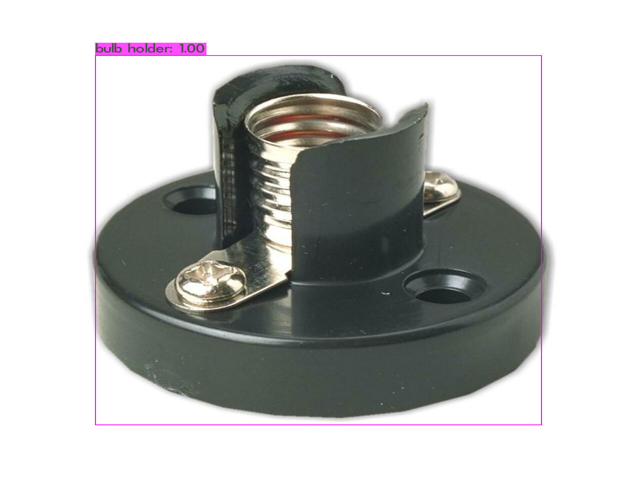

In [ ]:
# to check the predictions
from PIL import Image

im=Image.open('predictions.jpg')
im.resize((640,480))